# A Primer on Machine Learning

## Unsupervised learning

Basic machine learning to gain information using exploratory statstical methods. It is in principle identical to factor analysis.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pylab import plt, mpl
import yfinance as yf
yf.pdr_override()

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
sdate = "2000-01-01"
edate = "2023-01-06"

In [4]:
# data = web.DataReader('^GSPC', 'yahoo', sdate, edate) # should work but a Google colab bug seems to exist.
#data = web.get_data_yahoo('^GSPC', start="2017-01-01", end="2022-12-31")
data = web.get_data_yahoo('^GSPC', sdate, edate) # SP500 index
data = data.dropna() #dropping missing points

[*********************100%%**********************]  1 of 1 completed


In [5]:
SPX_P = data["Adj Close"]
type(SPX_P)

pandas.core.series.Series

In [6]:
SPX_P

Date
2000-01-03    1455.219971
2000-01-04    1399.420044
2000-01-05    1402.109985
2000-01-06    1403.449951
2000-01-07    1441.469971
                 ...     
2022-12-29    3849.280029
2022-12-30    3839.500000
2023-01-03    3824.139893
2023-01-04    3852.969971
2023-01-05    3808.100098
Name: Adj Close, Length: 5790, dtype: float64

In [7]:
data['rets'] = np.log(SPX_P / SPX_P.shift(1)) # Daily logarithmic return of SPX

In [8]:
data['vol_r'] = data['rets'].rolling(252).std()* np.sqrt(252) #Annualzied (sqrt(252)) standard deviation of daily returns in a rolling window fahshion.

In [9]:
Rvol = data["vol_r"]
data['dvol_r'] = np.log(Rvol / Rvol.shift(1)) #Daily volatility growth rate (log difference)

In [10]:
data['rets_1d_nxt'] = np.log(SPX_P.shift(-1) / SPX_P) # 1-day-ahead return (forecast)

In [11]:
data['rets_2d_nxt'] = np.log(SPX_P.shift(-2) / SPX_P) #2-day-ahead return (forecast)

In [12]:
data['rets_3d_nxt'] = np.log(SPX_P.shift(-3) / SPX_P)

In [13]:
data['rets_5d_nxt'] = np.log(SPX_P.shift(-5) / SPX_P)

In [14]:
data['rets_1m_nxt'] = np.log(SPX_P.shift(-21) / SPX_P)

In [15]:
data['rets_3m_nxt'] = np.log(SPX_P.shift(-63) / SPX_P)

In [16]:
data['rets_1yr_nxt'] = np.log(SPX_P.shift(-252) / SPX_P) #1-year-ahead return (forecast)

In [17]:
data = data.dropna()

In [18]:

import scipy.stats

Volatility Level versus Returns

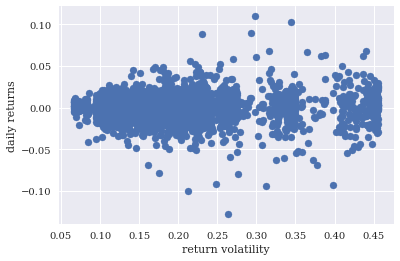

In [19]:
plt.scatter(data['vol_r'].values,data['rets'].values)
plt.xlabel("return volatility")
plt.ylabel("daily returns")
plt.show()

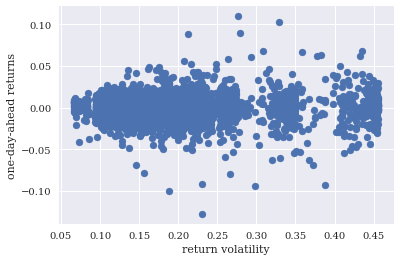

In [20]:
plt.scatter(data['vol_r'].values,data['rets_1d_nxt'].values)
plt.xlabel("return volatility")
plt.ylabel("one-day-ahead returns")
plt.show()

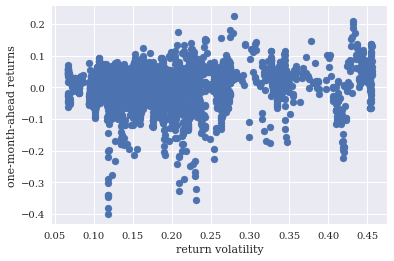

In [21]:
plt.scatter(data['vol_r'].values,data['rets_1m_nxt'].values)
plt.xlabel("return volatility")
plt.ylabel("one-month-ahead returns")
plt.show()

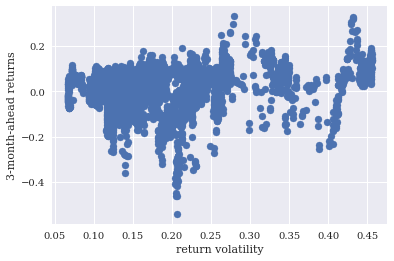

In [22]:
plt.scatter(data['vol_r'].values,data['rets_3m_nxt'].values)
plt.xlabel("return volatility")
plt.ylabel("3-month-ahead returns")
plt.show()

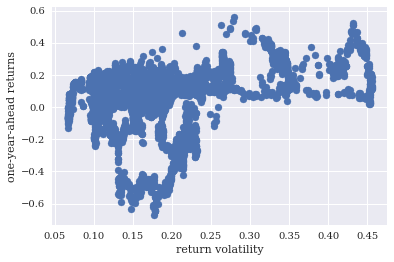

In [23]:
plt.scatter(data['vol_r'].values,data['rets_1yr_nxt'].values)
plt.xlabel("return volatility")
plt.ylabel("one-year-ahead returns")
plt.show()

Daily Growths of Volatility versus Returns

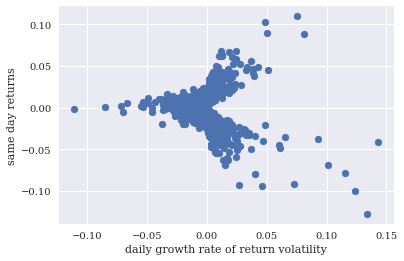

In [24]:
plt.scatter(data['dvol_r'].values,data['rets'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("same day returns")
plt.show()

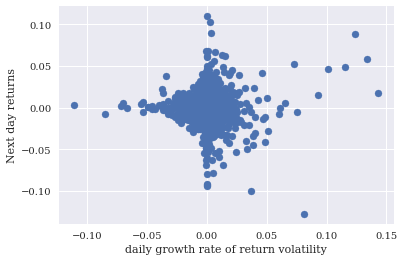

In [25]:
plt.scatter(data['dvol_r'].values,data['rets_1d_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("Next day returns")
plt.show()

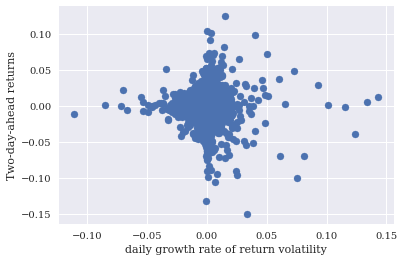

In [26]:
plt.scatter(data['dvol_r'].values,data['rets_2d_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("Two-day-ahead returns")
plt.show()

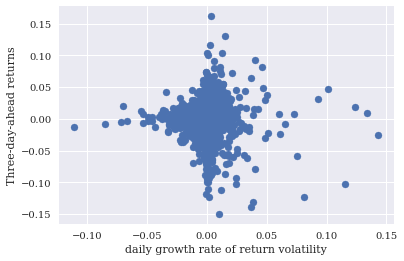

In [27]:
plt.scatter(data['dvol_r'].values,data['rets_3d_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("Three-day-ahead returns")
plt.show()

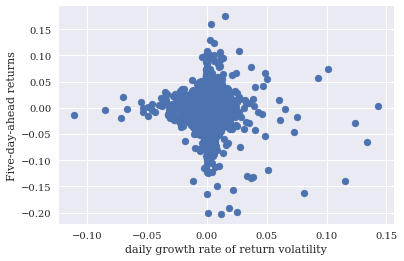

In [28]:
plt.scatter(data['dvol_r'].values,data['rets_5d_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("Five-day-ahead returns")
plt.show()

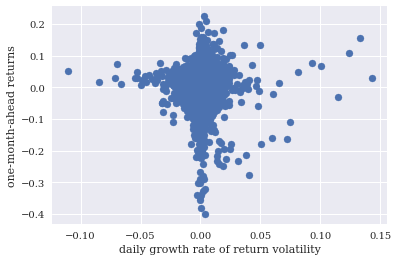

In [29]:
plt.scatter(data['dvol_r'].values,data['rets_1m_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("one-month-ahead returns")
plt.show()

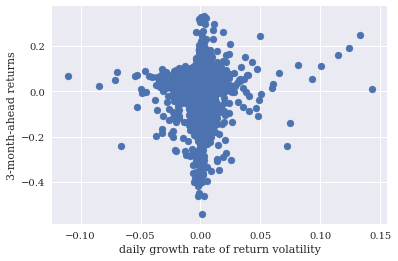

In [30]:
plt.scatter(data['dvol_r'].values,data['rets_3m_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("3-month-ahead returns")
plt.show()

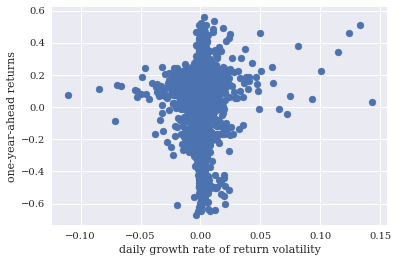

In [31]:
plt.scatter(data['dvol_r'].values,data['rets_1yr_nxt'].values)
plt.xlabel("daily growth rate of return volatility")
plt.ylabel("one-year-ahead returns")
plt.show()

Based on the above eyeballing, we may want to check how many clusters (or factors) can describe the seemingly nonlinear patterns. We can use clustering Machine Learning techniques. I introduce K-mean clustering first.

In [32]:
X1 = data[["dvol_r","rets"]] #Subset of the dataframe uses two brackets

In [33]:
from sklearn.cluster import KMeans #Maching learning Unsupervised module

In [34]:
model1 = KMeans(n_clusters=3, random_state=0) #Initiate

In [35]:
model1.fit(X1)

KMeans(n_clusters=3, random_state=0)

In [36]:
y_kmeans = model1.predict(X1) # Prediction step

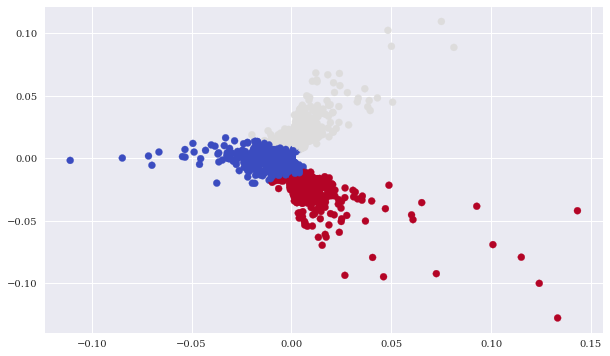

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(X1['dvol_r'],X1['rets'], c=y_kmeans, cmap='coolwarm');

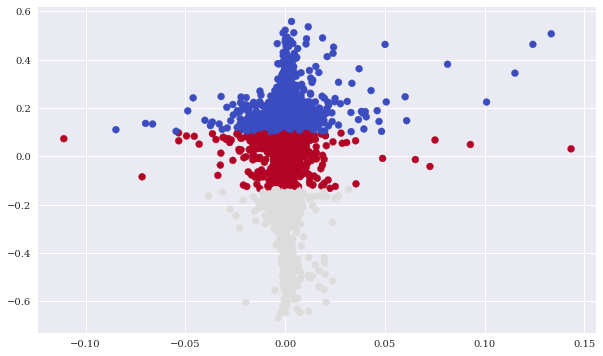

In [38]:
X2 = data[["dvol_r","rets_1yr_nxt"]] #Subset of the dataframe uses two brackets
model2 = KMeans(n_clusters=3, random_state=0) #Initiate
model2.fit(X2)
y2_kmeans = model2.predict(X2)

plt.figure(figsize=(10,6))
plt.scatter(X2['dvol_r'],X2['rets_1yr_nxt'], c=y2_kmeans, cmap='coolwarm');

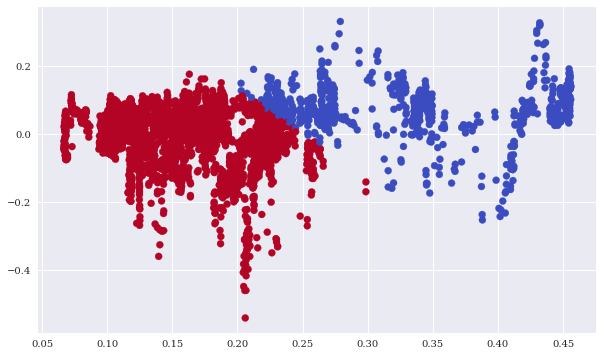

In [39]:
X3 = data[["vol_r","rets_3m_nxt"]] #Subset of the dataframe uses two brackets
model3 = KMeans(n_clusters=2, random_state=0) #Initiate
model3.fit(X3)
y3_kmeans = model3.predict(X3)

plt.figure(figsize=(10,6))
plt.scatter(X3['vol_r'],X3['rets_3m_nxt'], c=y3_kmeans, cmap='coolwarm');

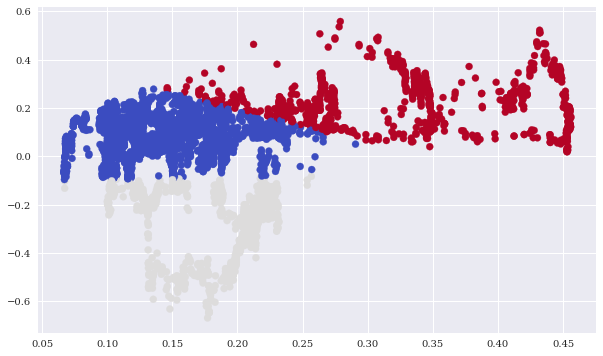

In [40]:
X4 = data[["vol_r","rets_1yr_nxt"]] #Subset of the dataframe uses two brackets
model4 = KMeans(n_clusters=3, random_state=0) #Initiate
model4.fit(X4)
y4_kmeans = model4.predict(X4)

plt.figure(figsize=(10,6))
plt.scatter(X4['vol_r'],X4['rets_1yr_nxt'], c=y4_kmeans, cmap='coolwarm');